In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [2]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    
    for a in images:
        try:
            image = Image.open(path + '\\' + a)
            image = image.resize((30,30))
            image = np.array(image)
            
            #sim = Image.fromarray(image)
            
            data.append(image)
            labels.append(i)
        except:
            print("Error Loading Image")
data = np.array(data)
labels = np.array(labels)

In [3]:
print(data.shape,labels.shape)
X_train,X_test,Y_train,Y_test = train_test_split(data,labels,test_size=0.2,random_state=42)

(39209, 30, 30, 3) (39209,)


In [4]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [5]:
Y_train = to_categorical(Y_train,43)
Y_test = to_categorical(Y_test,43)

In [6]:
print(Y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [7]:
print(Y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Model Training

In [8]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer ='adam',metrics=['accuracy'])

In [9]:
epochs = 15
history =  model.fit(X_train,Y_train,batch_size=64,epochs=epochs,validation_data=(X_test,Y_test))
model.save("my_model.h5")

Epoch 1/15
491/491 [==============================] - 57s 114ms/step - loss: 2.4187 - accuracy: 0.3969 - val_loss: 0.8032 - val_accuracy: 0.8104
Epoch 2/15
491/491 [==============================] - 54s 111ms/step - loss: 0.9462 - accuracy: 0.7257 - val_loss: 0.3328 - val_accuracy: 0.9129
Epoch 3/15
491/491 [==============================] - 56s 114ms/step - loss: 0.5989 - accuracy: 0.8250 - val_loss: 0.2135 - val_accuracy: 0.9396
Epoch 4/15
491/491 [==============================] - 56s 115ms/step - loss: 0.4503 - accuracy: 0.8671 - val_loss: 0.1802 - val_accuracy: 0.9480
Epoch 5/15
491/491 [==============================] - 56s 115ms/step - loss: 0.3649 - accuracy: 0.8930 - val_loss: 0.1619 - val_accuracy: 0.9596
Epoch 6/15
491/491 [==============================] - 56s 114ms/step - loss: 0.3209 - accuracy: 0.9039 - val_loss: 0.1198 - val_accuracy: 0.9651
Epoch 7/15
491/491 [==============================] - 57s 115ms/step - loss: 0.2632 - accuracy: 0.9234 - val_loss: 0.0728 - val_ac

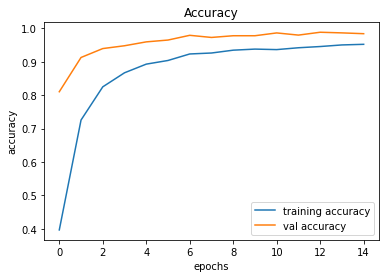

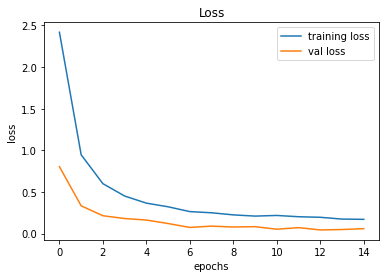

In [12]:
# Plotting for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'],label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label = 'val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [27]:
# testing accuracy on test dataset
from sklearn.metrics import accuracy_score
Y_test = pd.read_csv('Test.csv')

labels = Y_test["ClassId"].values
imgs = Y_test["Path"].values

data = []

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test = np.array(data)
pred = model.predict(X_test)
lpred = np.argmax(pred,axis=1)
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels,lpred))
model.save('traffic_classifier.h5')

0.9480601741884402


In [25]:
X_test

array([[[[116, 140, 175],
         [116, 138, 171],
         [119, 138, 173],
         ...,
         [102, 119, 150],
         [101, 122, 149],
         [ 93, 112, 139]],

        [[116, 142, 177],
         [116, 141, 175],
         [117, 141, 174],
         ...,
         [120, 143, 178],
         [122, 144, 176],
         [122, 142, 174]],

        [[118, 142, 174],
         [116, 141, 175],
         [114, 140, 172],
         ...,
         [121, 144, 181],
         [122, 144, 180],
         [119, 142, 178]],

        ...,

        [[117, 137, 168],
         [115, 135, 165],
         [116, 135, 164],
         ...,
         [116, 138, 170],
         [116, 136, 168],
         [118, 139, 171]],

        [[116, 136, 166],
         [115, 134, 167],
         [115, 133, 165],
         ...,
         [114, 135, 168],
         [116, 136, 166],
         [115, 139, 167]],

        [[112, 135, 166],
         [111, 134, 165],
         [119, 135, 166],
         ...,
         [115, 137, 166],
        